In [2]:
import pandas as pd
url = ("https://raw.githubusercontent.com/holleland/TECH3/"
"refs/heads/main/data/ekstrom2025.csv")
data = pd.read_csv(url, sep = ";")
data.head()

,id,date,treatment,reported_diceroll,correct_guess,age,female,education,universitydegree,sector,employed,highincome,politicalright,believeingod,believeinfreewill,generaltrust
0,1,07.05.2019 16:04,Trust_promise,1,0,37,0,3,1,1,1,NaN,6,10,10,9
1,2,07.05.2019 09:37,Control,2,0,53,0,4,1,1,1,1.0,4,1,10,9
2,3,07.05.2019 09:37,Trust_promise,6,0,29,0,4,1,1,1,1.0,9,1,11,8
3,4,07.05.2019 09:38,Trust_promise,1,0,20,1,2,0,3,0,0.0,5,1,8,7
4,5,07.05.2019 09:38,Control,2,0,66,1,2,0,1,1,0.0,10,10,6,9


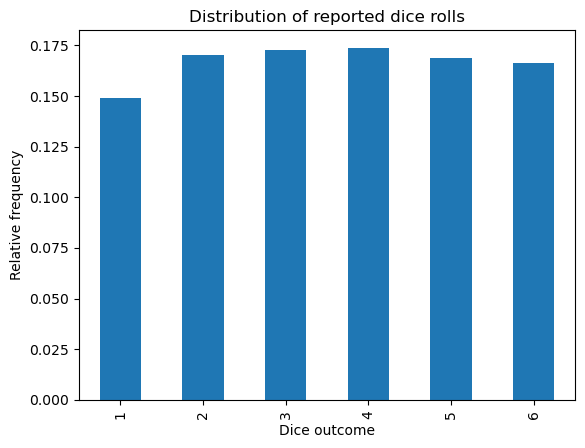

Expected probability for fair dice: 0.16666666666666666


In [7]:
import matplotlib.pyplot as plt
# count occurrences of each reported dice roll
counts = data["reported_diceroll"].value_counts().sort_index()

counts

# relative frequency (proportions)
rel_freq = data["reported_diceroll"].value_counts(normalize=True).sort_index()

rel_freq


rel_freq.plot(kind="bar")
plt.xlabel("Dice outcome")
plt.ylabel("Relative frequency")
plt.title("Distribution of reported dice rolls")
plt.show()

print("Expected probability for fair dice:", 1/6)



In [5]:
data["correct_guess"].mean()


np.float64(0.37125)

Estimated probability from data: 0.37125
Expected probability if honest (1/6): 0.16666666666666666


In [11]:


# Problem 6 — Descriptive statistics (NO hypothesis tests)

# ------------------------------------------------------------
# (1) "It is reasonable that we treat each respondent as independent of the others."
# This is mainly an assumption (design question), but you can at least check that
# each id is unique (no repeated respondent).
n = len(data)
n_unique_ids = data["id"].nunique()
print("Total rows (respondents):", n)
print("Unique ids:", n_unique_ids)
print("Any duplicate ids?", n_unique_ids != n)

# ------------------------------------------------------------
# (2) "Due to the experimental design, we know from the data whether or not an individual lies."
# You can't directly compute this from data (we don't observe the TRUE dice roll/guess for each person).
# But we CAN show we only observe reported outcomes and the indicator correct_guess.
print("\nColumns available:", list(data.columns))

# ------------------------------------------------------------
# (3) "Due to the experimental design, we know from the data that groups of people lie."
# Descriptively: compare observed correct_guess rate to the theoretical 1/6.
p_hat = data["correct_guess"].mean()
p_theory = 1/6
print("\nObserved P(correct_guess=1):", p_hat)
print("Theoretical P(correct guess) if honest:", p_theory)
print("Difference (observed - theory):", p_hat - p_theory)

# ------------------------------------------------------------
# (4) "If nobody lies, the expected number of people in the experiment that guess correct is 133."
# Compute expected count = n*(1/6) and compare to 133.
expected_correct = n * (1/6)
print("\nExpected # correct if honest (n * 1/6):", expected_correct)

# ------------------------------------------------------------
# (5) "In the data, there are 297 respondents that guessed correct."
# Compute the actual count in the dataset.
observed_correct = int(data["correct_guess"].sum())
print("\nObserved # correct in data:", observed_correct)

# ------------------------------------------------------------
# (6) "The dice roll and whether the respondent guess correct are independent events."
# Descriptively: compute P(correct | reported_diceroll = k) for k=1..6.
# If these are very different across k, it suggests association.
print("\nP(correct_guess=1 | reported_diceroll):")
print(data.groupby("reported_diceroll")["correct_guess"].mean().sort_index())

# ------------------------------------------------------------
# (7) "It is surprising that not everyone lies to get the chance to win the money."
# Descriptively: compare observed correct rate to 1 (if everyone lied perfectly, it would be near 1).
print("\nIf everyone lied to always be 'correct', P(correct_guess) would be near 1.")
print("Observed P(correct_guess):", p_hat)

# ------------------------------------------------------------
# (8) "People are more likely to be honest if they are told 'we trust you' and allowed to claim they can be trusted."
# Descriptively: compare correct rates by treatment group.
# (Lower correct rate = closer to 1/6 = less suspicious, i.e., *more honesty* as a group.)
print("\nP(correct_guess=1) by treatment:")
print(data.groupby("treatment")["correct_guess"].mean())

print("\nCounts by treatment:")
print(data["treatment"].value_counts())

# ------------------------------------------------------------
# (9) "People with higher income are more honest."
# Descriptively: compare correct rate by highincome (0/1).
print("\nP(correct_guess=1) by highincome:")
print(data.groupby("highincome")["correct_guess"].mean())

print("\nGroup sizes (highincome):")
print(data["highincome"].value_counts())

# ------------------------------------------------------------
# (10) "Since most religions tells their followers to not lie, the stronger you believe in God the more honest you are."
# Descriptive approach:
#   A) correlation between believeingod and correct_guess
#   B) average correct rate in low/mid/high belief bins
corr_god = data["believeingod"].corr(data["correct_guess"])
print("\nCorrelation(believeingod, correct_guess):", corr_god)

bins = [0, 3, 7, 11]
labels = ["low (1-3)", "mid (4-7)", "high (8-11)"]
data["god_bin"] = pd.cut(data["believeingod"], bins=bins, labels=labels, include_lowest=True)

print("\nP(correct_guess=1) by believeingod bin:")
print(data.groupby("god_bin")["correct_guess"].mean())

# ------------------------------------------------------------
# (11) "Public sector employees are more honest than in the private sector."
# Descriptively: compare correct rate by sector (1=Private, 2=Public, 3=Unemployed).
sector_map = {1: "Private", 2: "Public", 3: "Unemployed"}
data["sector_name"] = data["sector"].map(sector_map)

print("\nP(correct_guess=1) by sector:")
print(data.groupby("sector_name")["correct_guess"].mean())

print("\nGroup sizes (sector):")
print(data["sector_name"].value_counts())

# Optional: quick summary table you can paste into your write-up
summary = {
    "n": n,
    "observed_correct_count": observed_correct,
    "observed_correct_rate": p_hat,
    "expected_correct_count_if_honest": expected_correct,
    "expected_correct_rate_if_honest": p_theory
}
print("\nQuick summary:")
print(pd.Series(summary))


Total rows (respondents): 800
Unique ids: 800
Any duplicate ids? False

Columns available: ['id', 'date', 'treatment', 'reported_diceroll', 'correct_guess', 'age', 'female', 'education', 'universitydegree', 'sector', 'employed', 'highincome', 'politicalright', 'believeingod', 'believeinfreewill', 'generaltrust']

Observed P(correct_guess=1): 0.37125
Theoretical P(correct guess) if honest: 0.16666666666666666
Difference (observed - theory): 0.20458333333333337

Expected # correct if honest (n * 1/6): 133.33333333333331

Observed # correct in data: 297

P(correct_guess=1 | reported_diceroll):
reported_diceroll
1    0.260504
2    0.345588
3    0.326087
4    0.503597
5    0.422222
6    0.353383
Name: correct_guess, dtype: float64

If everyone lied to always be 'correct', P(correct_guess) would be near 1.
Observed P(correct_guess): 0.37125

P(correct_guess=1) by treatment:
treatment
Control          0.4525
Trust_promise    0.2900
Name: correct_guess, dtype: float64

Counts by treatment:
tre

C:\Users\shirw\AppData\Local\Temp\ipykernel_23464\3660110728.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby("god_bin")["correct_guess"].mean())
